# **Implementación Cascadas de Haar**

## Características de Haar
#### El algoritmo de Cascadas de Haar usa filtros restangulares que detectan contrastes de intensidad (claros/oscuros) en la imagen, características típicas de un rostro.
#### * Borde horizontal (Separación frente-cejas)
#### * Borde vertical (Nariz-mejillas)
#### * Rectángulos centrados (Ojos, región oscura sobre fondo claro)
#### * Linea horizontal (Boca)

In [4]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

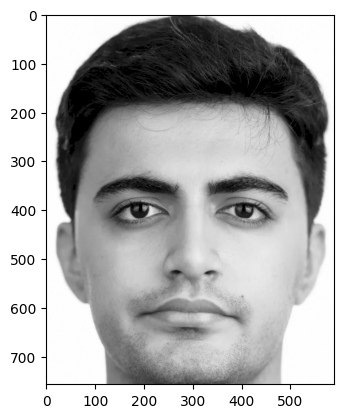

In [20]:
cara1 = cv.imread("cara1.png", cv.IMREAD_GRAYSCALE)

plt.imshow(cara1, cmap='gray', vmin=0, vmax=255)
plt.show()

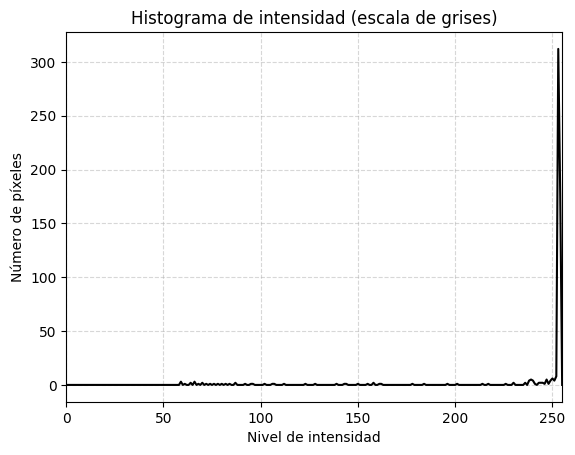

In [21]:
histograma = cv.calcHist(cara1, [0], None, [256], [0, 255])

plt.figure()
plt.title('Histograma de intensidad (escala de grises)')
plt.xlabel('Nivel de intensidad')
plt.ylabel('Número de píxeles')
plt.plot(histograma, color='black')
plt.xlim([0, 255])
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

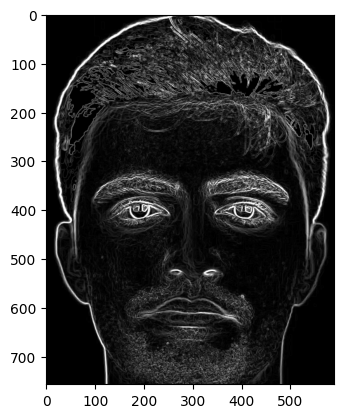

In [22]:
sobel_x = cv.Sobel(cara1, cv.CV_64F, 1, 0, ksize=3)  # Bordes verticales
sobel_y = cv.Sobel(cara1, cv.CV_64F, 0, 1, ksize=3)  # Bordes horizontales
sobel_comb = np.sqrt(sobel_x**2 + sobel_y**2)  # Combinación

plt.imshow(sobel_comb, cmap='gray', vmin=0, vmax=255)
plt.show()

